# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pprint import pprint
import math
import random
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
total_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
total_data

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [2]:
# Checking the number of mice.

len(set(list(total_data['Mouse ID'])))

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# new_data = total_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
# new_data

data = total_data.groupby(['Mouse ID', 'Timepoint']).groups



#g989 is the mouse with duplicate time codes



In [6]:
# Optional: Get all the data for the duplicate mouse ID. 


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_data = total_data.loc[total_data['Mouse ID'] != 'g989']
    
new_data

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [8]:
# Checking the number of mice in the clean DataFrame.
len(set(list(new_data['Mouse ID'])))

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

sum_df = pd.DataFrame()
drugs = set(new_data['Drug Regimen'])

drug_mean = new_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_median = new_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_var = new_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_std = new_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_count = new_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()
drug_sem = [std/math.sqrt(pop) for std,pop in zip(drug_std.values,drug_count.values)]

sum_df['Drug Regimen'] = list(drugs)
sum_df['mean'] = drug_mean.values
sum_df['median'] = drug_median.values
sum_df['var'] = drug_var.values
sum_df['std'] = drug_std.values
sum_df['sem'] = drug_sem
sum_df['count'] = drug_count.values

sum_df

Drug Regimen       mean     median        var       std       sem  count
0      Placebo  40.675741  41.557809  24.947764  4.994774  0.329346    230
1     Ketapril  52.591172  51.776157  39.290177  6.268188  0.469821    178
2     Ramicane  52.884795  51.820584  43.128684  6.567243  0.492236    178
3     Ceftamin  55.235638  53.698743  68.553577  8.279709  0.603860    188
4    Capomulin  54.331565  52.509285  66.173479  8.134708  0.596466    186
5    Zoniferol  54.033581  52.288934  61.168083  7.821003  0.581331    181
6     Propriva  52.320930  50.446266  43.852013  6.622085  0.544332    148
7    Infubinol  40.216745  40.673236  23.486704  4.846308  0.320955    228
8     Stelasyn  54.233149  52.431737  59.450562  7.710419  0.573111    181
9     Naftisol  53.236507  51.818479  48.533355  6.966589  0.516398    182

In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
agg_df = new_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median', 'var', 'std','sem'])
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

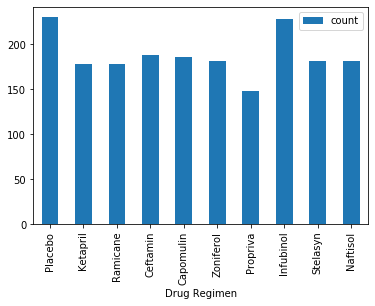

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
sum_df.plot('Drug Regimen', 'count', kind='bar')
plt.show()

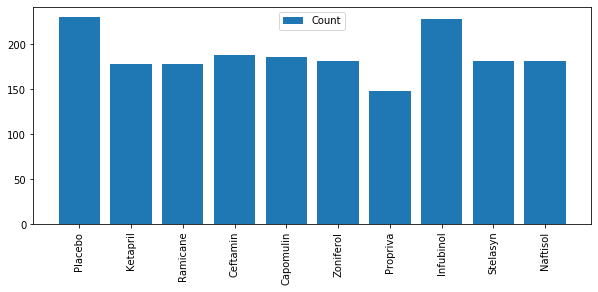

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure().set_figwidth(10)
plt.bar(sum_df['Drug Regimen'], sum_df['count'])
plt.xticks(rotation=90)
plt.legend(['Count'], loc='upper center')
plt.show()

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
unique_mice = new_data.drop_duplicates('Mouse ID')
grouped_mice_sex = unique_mice.groupby('Sex')['Mouse ID'].count()
labels = grouped_mice_sex.index
counts = grouped_mice_sex.values


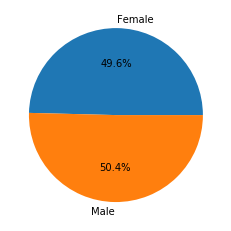

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts, labels = labels, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
last_measurement = new_data.groupby('Mouse ID')['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

tumor_volume_df = pd.merge(new_data,last_measurement, on=['Mouse ID', 'Timepoint'])

tumor_volume_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       k403     Ramicane    Male          21          16         45   
1       s185    Capomulin  Female           3          17         45   
2       x401    Capomulin  Female          16          15         45   
3       m601    Capomulin    Male          22          17         45   
4       g791     Ramicane    Male          11          16         45   
..       ...          ...     ...         ...         ...        ...   
243     z314     Stelasyn  Female          21          28          5   
244     z435     Propriva  Female          12          26         10   
245     z581    Infubinol  Female          24          25         45   
246     z795     Naftisol  Female          13          29         45   
247     z969     Naftisol    Male           9          30         45   

     Tumor Volume (mm3)  Metastatic Sites  
0             22.050126                 1  
1             23.343598                 1  
2             28.484033                 0  
3             28.430964                 1  
4             29.128472                 1  
..                  ...               ...  
243           45.934712                 0  
244           48.710661                 0  
245           62.754451                 3  
246           65.741070                 3  
247           73.867845                 4  

[248 rows x 8 columns]

In [54]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
drugs = []
tumor_vol = []

    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    tumor_vol_data = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] ==drug,'Tumor Volume (mm3)'].values
    for value in tumor_vol_data:
        drugs.append(drug)
        tumor_vol.append(value)
    
    lowerq = round(np.quantile(tumor_vol_data,.25),2)
    upperq = round(np.quantile(tumor_vol_data,.75),2)
    median = round(np.quantile(tumor_vol_data,.5),2)
    iqr = round(upperq-lowerq,2)

    print(f"The lower quartile of tumor volume for {drug} is: {lowerq} (mm3)")
    print(f"The upper quartile of tumor volume for {drug} is: {upperq} (mm3)")
    print(f"The interquartile range of tumor volume for {drug} is: {iqr} (mm3)")
    print(f"The the median of tumor volume for {drug} is: {median} (mm3)")

    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    upper_outliers = tumor_volume_df.loc[(tumor_volume_df['Drug Regimen'] == drug) & (tumor_volume_df['Tumor Volume (mm3)'] > upper_bound)]
    lower_outliers = tumor_volume_df.loc[(tumor_volume_df['Drug Regimen'] == drug) & (tumor_volume_df['Tumor Volume (mm3)'] < lower_bound)]
    # Determine outliers using upper and lower bounds
    
    
    lower_values = list(lower_outliers['Mouse ID'].values)
    upper_values = list(upper_outliers['Mouse ID'].values)
    if len(lower_outliers['Mouse ID'].values) == 0:
        print("No Lower Outliers")
    else:
        print(f"Lower Outliers: {lower_values}")
              
    if len(upper_outliers['Mouse ID'].values) == 0:
        print("No Upper Outliers")
    else:
        print(f'Upper Outliers: {upper_values}')
    
    
    
    
    

    print('\n')

The lower quartile of tumor volume for Capomulin is: 32.38 (mm3)
The upper quartile of tumor volume for Capomulin is: 40.16 (mm3)
The interquartile range of tumor volume for Capomulin is: 7.78 (mm3)
The the median of tumor volume for Capomulin is: 38.13 (mm3)
No Lower Outliers
No Upper Outliers


The lower quartile of tumor volume for Ramicane is: 31.56 (mm3)
The upper quartile of tumor volume for Ramicane is: 40.66 (mm3)
The interquartile range of tumor volume for Ramicane is: 9.1 (mm3)
The the median of tumor volume for Ramicane is: 36.56 (mm3)
No Lower Outliers
No Upper Outliers


The lower quartile of tumor volume for Infubinol is: 54.05 (mm3)
The upper quartile of tumor volume for Infubinol is: 65.53 (mm3)
The interquartile range of tumor volume for Infubinol is: 11.48 (mm3)
The the median of tumor volume for Infubinol is: 60.17 (mm3)
Lower Outliers: ['c326']
No Upper Outliers


The lower quartile of tumor volume for Ceftamin is: 48.72 (mm3)
The upper quartile of tumor volume for 

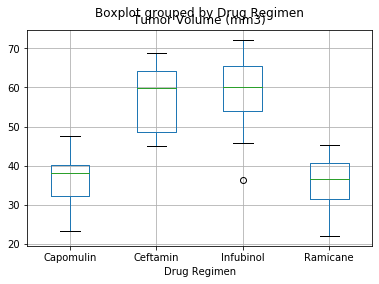

In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_df = pd.DataFrame()
box_df['Drug Regimen'] = drugs
box_df['Tumor Volume (mm3)'] = tumor_vol

box_df.boxplot('Tumor Volume (mm3)', by='Drug Regimen')

## Line and Scatter Plots

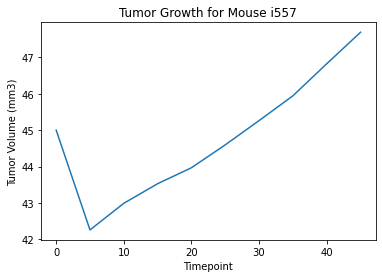

In [206]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Instead of just choosing one mouse I decided to have the code randomly select a mouse

mouse_index = random.randint(0, len(set(list(new_data['Mouse ID']))))

mouse_id = list(set(new_data['Mouse ID']))[mouse_index]
x_values = new_data['Timepoint'].loc[new_data['Mouse ID'] == mouse_id].values
y_values = new_data['Tumor Volume (mm3)'].loc[new_data['Mouse ID'] == mouse_id].values

plt.plot(x_values,y_values)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Growth for Mouse {mouse_id}")
plt.show()



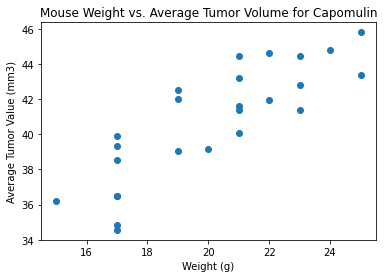

In [228]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = new_data.loc[new_data['Drug Regimen'] == 'Capomulin']
mass = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

average_tumor = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()



plt.scatter(mass.values, average_tumor.values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Value (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


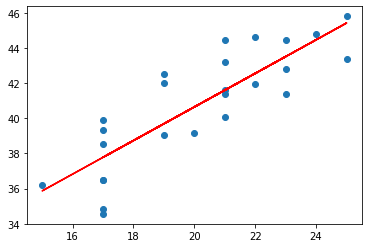

In [243]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
res = st.linregress(mass.values, average_tumor.values)

print(f"The correlation between mouse weight and the average tumor volume is {round(res.rvalue,2)}")

plt.scatter(mass.values, average_tumor.values)
plt.plot(mass.values,res.intercept + res.slope*mass.values, 'r', label='fitted line')
plt.show()